## CitiBike Usage and Income Relationship 

### IRS Data
#### - Income data from the IRS site is https://www.irs.gov/pub/irs-soi/?C=N;O=D

### CitiBike Data
#### - The data for this analysis was obtained from the CitiBike System Data portal https://www.citibikenyc.com/system-data
#### - Period: Apr - Jun 2017

#### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

#### Import IRS data

In [2]:
df_irs = pd.read_excel('17zp33ny.xlsx', skiprows=3, index_col='ZIP\ncode [1]')
df_irs.head()

,Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number of electronically filed returns,Number of computer prepared paper returns,Number with paid preparer's signature,Number of returns with direct deposit,Number of exemptions,...,Net investment income tax,Unnamed: 142,Tax due at time of filing [12],Unnamed: 144,Total overpayments,Unnamed: 146,Overpayments refunded [13],Unnamed: 148,Credited to next year's estimated tax,Unnamed: 150
ZIP code [1],,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount
NaN,NaN,-1.0,-2.0,-3.0,-4.0,-5.0,-6.0,-7.0,-8.0,-9.0,...,-140,-141,-142,-143,-144,-145,-146,-147,-148,-149
0,Total,9580270.0,4940030.0,2950010.0,1479490.0,8838780.0,371720.0,6142640.0,5822740.0,17302950.0,...,365760,2798529,1888640,11352484,7414030,31799173,7191590,22501066,260090,8827498
0,"$1 under $25,000",3350620.0,2314770.0,422340.0,562630.0,3037920.0,163740.0,2043150.0,1983920.0,4647830.0,...,40,22,447720,407210,2655500,5487553,2635880,5438358,22170,40415
0,"$25,000 under $50,000",2159110.0,1191460.0,437030.0,481010.0,2004130.0,80180.0,1300800.0,1528460.0,3800450.0,...,40,16,302310,506708,1843050,4780158,1823880,4713767,24320,60615


In [3]:
len(df_irs.index)

12315

In [4]:
list(df_irs.columns)

['Size of adjusted gross income',
 'Number of returns',
 'Number of single returns',
 'Number of joint returns',
 'Number of head of household returns',
 'Number of electronically filed returns',
 'Number of computer prepared paper returns',
 "Number with paid preparer's signature",
 'Number of returns with direct deposit',
 'Number of exemptions',
 'Number of dependent exemptions',
 'Number of volunteer prepared returns [2]',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Number of refund anticipation check returns [3]',
 'Number of elderly returns [4]',
 'Adjusted gross income (AGI) [5]',
 'Total income',
 'Unnamed: 20',
 'Salaries and wages in AGI',
 'Unnamed: 22',
 'Taxable interest',
 'Unnamed: 24',
 'Ordinary dividends',
 'Unnamed: 26',
 'Qualified dividends [6]',
 'Unnamed: 28',
 'State and local income tax refunds\n',
 'Unnamed: 30',
 'Business or profession\nnet income (less loss)',
 'Unnamed: 32',
 'Net capital gain (less loss) in AGI',
 'Unnamed: 34',
 'Taxable individual

In [5]:
# Adjusted gross income for a UES 10128 zipcode

df_irs.loc[[10128]][['Size of adjusted gross income', 'Adjusted gross income (AGI) [5]']]

,Size of adjusted gross income,Adjusted gross income (AGI) [5]
ZIP code [1],,
10128,NaN,12783790.0
10128,"$1 under $25,000",62683.0
10128,"$25,000 under $50,000",157717.0
10128,"$50,000 under $75,000",294957.0
10128,"$75,000 under $100,000",314222.0
10128,"$100,000 under $200,000",954430.0
10128,"$200,000 or more",10999781.0


In [6]:
# Adjusted gross income for a UES 10128 zipcode (continued)

print ("Adjusted gross income for zipcode 10128:", 
       df_irs.loc[[10128]]["Adjusted gross income (AGI) [5]"].iloc[0])

Adjusted gross income for zipcode 10128: 12783790.0


In [7]:
# Adjusted gross income for a UES 10128 zipcode (continued)

df_irs.loc[[10128]]

,Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number of electronically filed returns,Number of computer prepared paper returns,Number with paid preparer's signature,Number of returns with direct deposit,Number of exemptions,...,Net investment income tax,Unnamed: 142,Tax due at time of filing [12],Unnamed: 144,Total overpayments,Unnamed: 146,Overpayments refunded [13],Unnamed: 148,Credited to next year's estimated tax,Unnamed: 150
ZIP code [1],,,,,,,,,,,,,,,,,,,,,
10128,NaN,33300.0,20900.0,9500.0,1850.0,30700.0,1260.0,21030.0,15270.0,51860.0,...,6350,115269,9590,142040,22550,434249,19100,118700,3980,315547
10128,"$1 under $25,000",5690.0,4760.0,360.0,430.0,5040.0,260.0,3530.0,2210.0,5530.0,...,0,0,1160,1226,3580,5800,3280,5072,340,727
10128,"$25,000 under $50,000",4200.0,3380.0,350.0,340.0,3840.0,170.0,2260.0,2420.0,5130.0,...,0,0,910,2101,3210,7305,3050,6611,200,694
10128,"$50,000 under $75,000",4730.0,3910.0,390.0,260.0,4360.0,170.0,2340.0,2870.0,5670.0,...,0,0,1100,2642,3600,8780,3440,7806,210,974
10128,"$75,000 under $100,000",3630.0,2820.0,470.0,190.0,3360.0,120.0,2010.0,2150.0,4590.0,...,0,0,860,3506,2740,8195,2570,7233,220,962
10128,"$100,000 under $200,000",6800.0,4190.0,2030.0,330.0,6330.0,250.0,4230.0,3770.0,10410.0,...,120,56,1830,10913,4940,26888,4430,21226,620,5662
10128,"$200,000 or more",8250.0,1840.0,5900.0,300.0,7770.0,290.0,6660.0,1850.0,20530.0,...,6230,115213,3730,121652,4480,377281,2330,70752,2390,306528


In [8]:
df_zip = df_irs.groupby(df_irs.index).first()[['Adjusted gross income (AGI) [5]', 'Number of returns', 'Number of joint returns', 
                                               'Number of dependent exemptions']]
df_zip.head()

,Adjusted gross income (AGI) [5],Number of returns,Number of joint returns,Number of dependent exemptions
ZIP code [1],,,,
0,852298824.0,9580270.0,2950010.0,5329240.0
10001,2785807.0,15340.0,2700.0,3350.0
10002,2489499.0,42290.0,10170.0,16840.0
10003,8764798.0,28950.0,5340.0,4530.0
10004,931468.0,2450.0,790.0,1120.0


In [9]:
df_zip.index = pd.to_numeric(df_zip.index, errors="coerse")
df_zip = df_zip[df_zip.index.notnull()]
df_zip.index = df_zip.index.astype(int)

In [10]:
df_zip.head()

,Adjusted gross income (AGI) [5],Number of returns,Number of joint returns,Number of dependent exemptions
ZIP code [1],,,,
0,852298824.0,9580270.0,2950010.0,5329240.0
10001,2785807.0,15340.0,2700.0,3350.0
10002,2489499.0,42290.0,10170.0,16840.0
10003,8764798.0,28950.0,5340.0,4530.0
10004,931468.0,2450.0,790.0,1120.0


In [11]:
df_zip.dtypes

Adjusted gross income (AGI) [5]    float64
Number of returns                  float64
Number of joint returns            float64
Number of dependent exemptions     float64
dtype: object

In [12]:
df_zip.index.dtype

dtype('int64')

In [13]:
print('The total number of unique zip codes is', len(df_zip))

The total number of unique zip codes is 1537


In [14]:
df_zip.reset_index(inplace=True)
df_zip.rename(columns = {"ZIP\ncode [1]":"Zipcodes", "Adjusted gross income (AGI) [5]":"Income"}, inplace=True)
df_zip.head()

,Zipcodes,Income,Number of returns,Number of joint returns,Number of dependent exemptions
0,0,852298824.0,9580270.0,2950010.0,5329240.0
1,10001,2785807.0,15340.0,2700.0,3350.0
2,10002,2489499.0,42290.0,10170.0,16840.0
3,10003,8764798.0,28950.0,5340.0,4530.0
4,10004,931468.0,2450.0,790.0,1120.0


In [15]:
# Income per person calculation

df_zip['Individual_Income'] = df_zip['Income'] / (df_zip['Number of returns'] + df_zip['Number of dependent exemptions'] + df_zip['Number of joint returns'])

In [16]:
df_zip.head()

,Zipcodes,Income,Number of returns,Number of joint returns,Number of dependent exemptions,Individual_Income
0,0,852298824.0,9580270.0,2950010.0,5329240.0,47.722381
1,10001,2785807.0,15340.0,2700.0,3350.0,130.238756
2,10002,2489499.0,42290.0,10170.0,16840.0,35.923506
3,10003,8764798.0,28950.0,5340.0,4530.0,225.780474
4,10004,931468.0,2450.0,790.0,1120.0,213.639450


In [17]:
df_zip[df_zip['Zipcodes'] ==10128]

,Zipcodes,Income,Number of returns,Number of joint returns,Number of dependent exemptions,Individual_Income
42,10128,12783790.0,33300.0,9500.0,10720.0,238.860052


#### Import CitiBike Data

In [18]:
zip_file = zipfile.ZipFile('201706-citibike-tripdata.csv.zip')
zip_file.extractall()
zip_file.open('201706-citibike-tripdata.csv')
df_citi = pd.read_csv('201706-citibike-tripdata.csv')
df_citi.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1397,2017-06-01 00:00:02,2017-06-01 00:23:19,515,W 43 St & 10 Ave,40.760094,-73.994618,3285,W 87 St & Amsterdam Ave,40.788390,-73.974700,26642,Subscriber,1967.0,1
1,1103,2017-06-01 00:00:13,2017-06-01 00:18:37,488,W 39 St & 9 Ave,40.756458,-73.993722,297,E 15 St & 3 Ave,40.734232,-73.986923,25656,Subscriber,1981.0,1
2,1810,2017-06-01 00:00:20,2017-06-01 00:30:31,461,E 20 St & 2 Ave,40.735877,-73.982050,465,Broadway & W 41 St,40.755136,-73.986580,21023,Subscriber,1982.0,1
3,1760,2017-06-01 00:00:24,2017-06-01 00:29:45,2009,Catherine St & Monroe St,40.711174,-73.996826,527,E 33 St & 2 Ave,40.744023,-73.976056,25718,Subscriber,1973.0,2
4,2165,2017-06-01 00:00:33,2017-06-01 00:36:38,360,William St & Pine St,40.707179,-74.008873,474,5 Ave & E 29 St,40.745168,-73.986831,18691,Subscriber,1985.0,1


In [19]:
# pip install geopy

In [20]:
df = df_citi[['start station latitude', 'start station longitude']]

In [21]:
df.shape

(1731594, 2)

In [22]:
df = df_citi[['start station latitude', 'start station longitude']].drop_duplicates()

In [23]:
df.shape

(624, 2)

In [24]:
df.reset_index(inplace = True, drop = True)

In [25]:
import geopy
import pandas as pd


def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df[lat_field], df[lon_field]))
    return location.raw['address']


geolocator = geopy.Nominatim(user_agent='my-application', timeout=3)

df['Location'] = df.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='start station latitude', lon_field='start station longitude')

In [26]:
df['Location'].head()

0    {'amenity': 'Citi Bike - W 43 St & 10 Ave', 'r...
1    {'amenity': 'Citi Bike - W 39 St & 9 Ave', 'ro...
2    {'amenity': 'Citi Bike - E 20 St & 2 Ave', 'ro...
3    {'amenity': 'Citi Bike - Catherine St & Monroe...
4    {'place': 'Chase Manhattan Plaza', 'road': 'Wi...
Name: Location, dtype: object

In [27]:
df['Zipcodes'] = [x.get('postcode') for x in df['Location']]

In [28]:
df.head(20)

,start station latitude,start station longitude,Location,Zipcodes
0,40.760094,-73.994618,"{'amenity': 'Citi Bike - W 43 St & 10 Ave', 'r...",10036
1,40.756458,-73.993722,"{'amenity': 'Citi Bike - W 39 St & 9 Ave', 'ro...",10018
2,40.735877,-73.982050,"{'amenity': 'Citi Bike - E 20 St & 2 Ave', 'ro...",10010
3,40.711174,-73.996826,{'amenity': 'Citi Bike - Catherine St & Monroe...,10038
4,40.707179,-74.008873,"{'place': 'Chase Manhattan Plaza', 'road': 'Wi...",10038
5,40.689269,-73.989129,"{'amenity': 'Brooklyn Detention Complex', 'roa...",11217
6,40.739017,-74.002638,{'amenity': 'Citi Bike - Greenwich Ave & 8 Ave...,10014
7,40.689407,-73.968855,{'amenity': 'Citi Bike - DeKalb Ave & Vanderbi...,11221
8,40.729554,-73.980572,"{'amenity': 'Citi Bike - E 13 St & Avenue A', ...",10009
9,40.714979,-74.013012,"{'neighbourhood': 'Tribeca', 'suburb': 'Manhat...",None


In [29]:
df.dropna(inplace=True)

In [30]:
df.reset_index(inplace = True, drop = True)

In [31]:
df.head(20)

,start station latitude,start station longitude,Location,Zipcodes
0,40.760094,-73.994618,"{'amenity': 'Citi Bike - W 43 St & 10 Ave', 'r...",10036
1,40.756458,-73.993722,"{'amenity': 'Citi Bike - W 39 St & 9 Ave', 'ro...",10018
2,40.735877,-73.982050,"{'amenity': 'Citi Bike - E 20 St & 2 Ave', 'ro...",10010
3,40.711174,-73.996826,{'amenity': 'Citi Bike - Catherine St & Monroe...,10038
4,40.707179,-74.008873,"{'place': 'Chase Manhattan Plaza', 'road': 'Wi...",10038
5,40.689269,-73.989129,"{'amenity': 'Brooklyn Detention Complex', 'roa...",11217
6,40.739017,-74.002638,{'amenity': 'Citi Bike - Greenwich Ave & 8 Ave...,10014
7,40.689407,-73.968855,{'amenity': 'Citi Bike - DeKalb Ave & Vanderbi...,11221
8,40.729554,-73.980572,"{'amenity': 'Citi Bike - E 13 St & Avenue A', ...",10009
9,40.737815,-73.999947,"{'amenity': 'Citi Bike - W 13 St & 7 Ave', 'ro...",10011


In [32]:
df.shape

(610, 4)

In [33]:
df['Zipcodes'] = df['Zipcodes'].str.split(':').str[0]
df['Zipcodes'] = df['Zipcodes'].str.split('-').str[0]

In [34]:
df.dtypes

start station latitude     float64
start station longitude    float64
Location                    object
Zipcodes                    object
dtype: object

In [35]:
df['Zipcodes'] = df['Zipcodes'].apply(pd.to_numeric)

In [36]:
# Citi bike data export
# df.to_csv('citi_bike_cleaned.csv', index=False)

In [37]:
df_citi_updated = pd.merge(df_citi, df[['Zipcodes', 'start station latitude']], on='start station latitude')

In [38]:
df_citi_updated.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Zipcodes
0,1397,2017-06-01 00:00:02,2017-06-01 00:23:19,515,W 43 St & 10 Ave,40.760094,-73.994618,3285,W 87 St & Amsterdam Ave,40.788390,-73.974700,26642,Subscriber,1967.0,1,10036
1,728,2017-06-01 04:02:37,2017-06-01 04:14:45,515,W 43 St & 10 Ave,40.760094,-73.994618,497,E 17 St & Broadway,40.737050,-73.990093,16511,Subscriber,1963.0,1,10036
2,450,2017-06-01 05:11:20,2017-06-01 05:18:51,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,28425,Subscriber,1954.0,1,10036
3,834,2017-06-01 06:00:34,2017-06-01 06:14:28,515,W 43 St & 10 Ave,40.760094,-73.994618,491,E 24 St & Park Ave S,40.740964,-73.986022,28678,Subscriber,1986.0,1,10036
4,834,2017-06-01 06:00:34,2017-06-01 06:14:29,515,W 43 St & 10 Ave,40.760094,-73.994618,491,E 24 St & Park Ave S,40.740964,-73.986022,27221,Subscriber,1986.0,1,10036


In [39]:
df_citi_updated = df_citi_updated[df_citi_updated['Zipcodes'] >= 10000]

In [40]:
# Group rides by zip code

citi_grouped = df_citi_updated.groupby('Zipcodes', as_index=False).count()[['Zipcodes', 'tripduration']]

In [41]:
citi_grouped.head()

,Zipcodes,tripduration
0,10000,7208
1,10001,50796
2,10002,73011
3,10003,60884
4,10004,4895


In [42]:
cbike_income = pd.merge(df_zip, citi_grouped, on='Zipcodes', how='inner')

In [43]:
cbike_income.rename(columns = {'tripduration':'Number of rides'}, inplace=True)

In [44]:
cbike_income.head()

,Zipcodes,Income,Number of returns,Number of joint returns,Number of dependent exemptions,Individual_Income,Number of rides
0,10001,2785807.0,15340.0,2700.0,3350.0,130.238756,50796
1,10002,2489499.0,42290.0,10170.0,16840.0,35.923506,73011
2,10003,8764798.0,28950.0,5340.0,4530.0,225.780474,60884
3,10004,931468.0,2450.0,790.0,1120.0,213.639450,4895
4,10005,2289217.0,5920.0,1240.0,1140.0,275.809277,23258


## Exploratory Analysis

#### Scatterplot is used to identify if there is an obvious relationship between the number of rides and income

Text(0, 0.5, 'Number of rides')

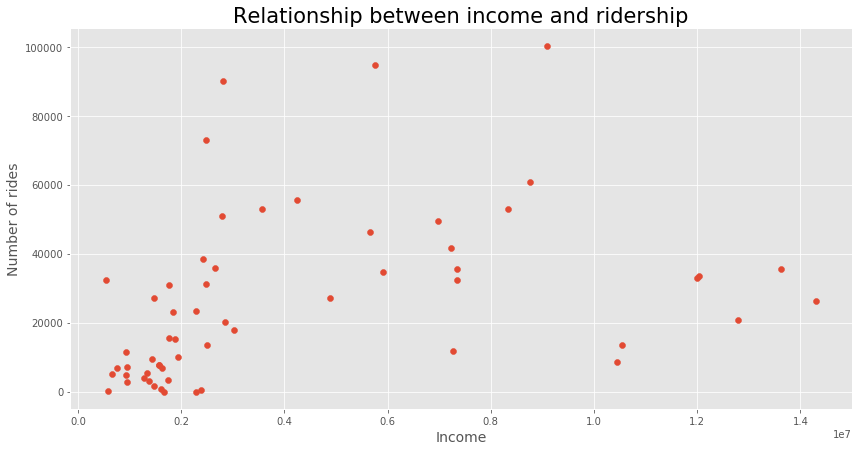

In [45]:
fig, ax = plt.subplots(figsize=(14,7))
ax.scatter(cbike_income['Income'], cbike_income['Number of rides'], marker='o')
ax.set_title('Relationship between income and ridership', fontsize=21)
ax.set_xlabel('Income', fontsize=14)
ax.set_ylabel('Number of rides', fontsize=14)

### OLS using Statsmodels

In [46]:
x = cbike_income['Income']
y = cbike_income['Number of rides']

model = smf.ols(formula = 'y ~ x', data=cbike_income).fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     8.693
Date:                Fri, 10 Jul 2020   Prob (F-statistic):            0.00465
Time:                        16:13:25   Log-Likelihood:                -663.27
No. Observations:                  58   AIC:                             1331.
Df Residuals:                      56   BIC:                             1335.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.613e+04   4474.620      3.605      0.001    7166.949    2.51e+04
x              0.0023      0.001      2.948      0.005       0.001       0.004
==============================================================================
Omnibus:                       19.472   Durbin-Watson:                   1.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.629
Skew:                           1.374   Prob(JB):                     4.49e-06
Kurtosis:                       4.624   Cond. No.                     8.42e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

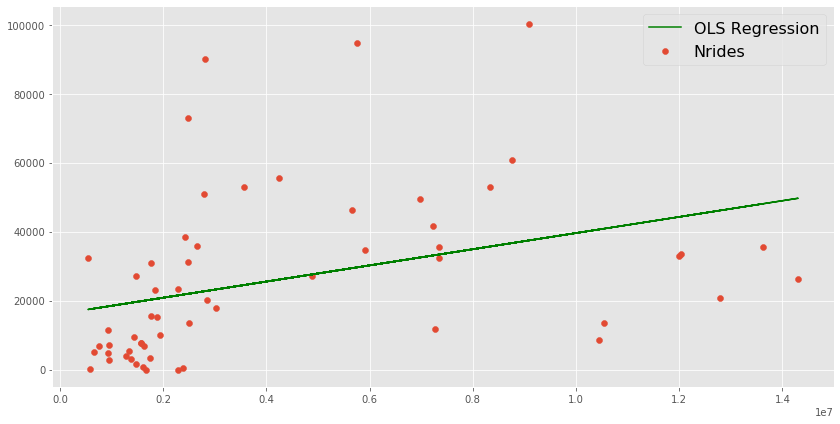

In [47]:
fig, ax = plt.subplots(figsize=(14,7))
ax.scatter(cbike_income['Income'], cbike_income['Number of rides'], marker='o', label='Nrides')
ax.plot(x, model.predict(), color='green', label='OLS Regression')
ax.legend(loc = 'upper right', fontsize = 16)
model.summary()

### Identifying outliers

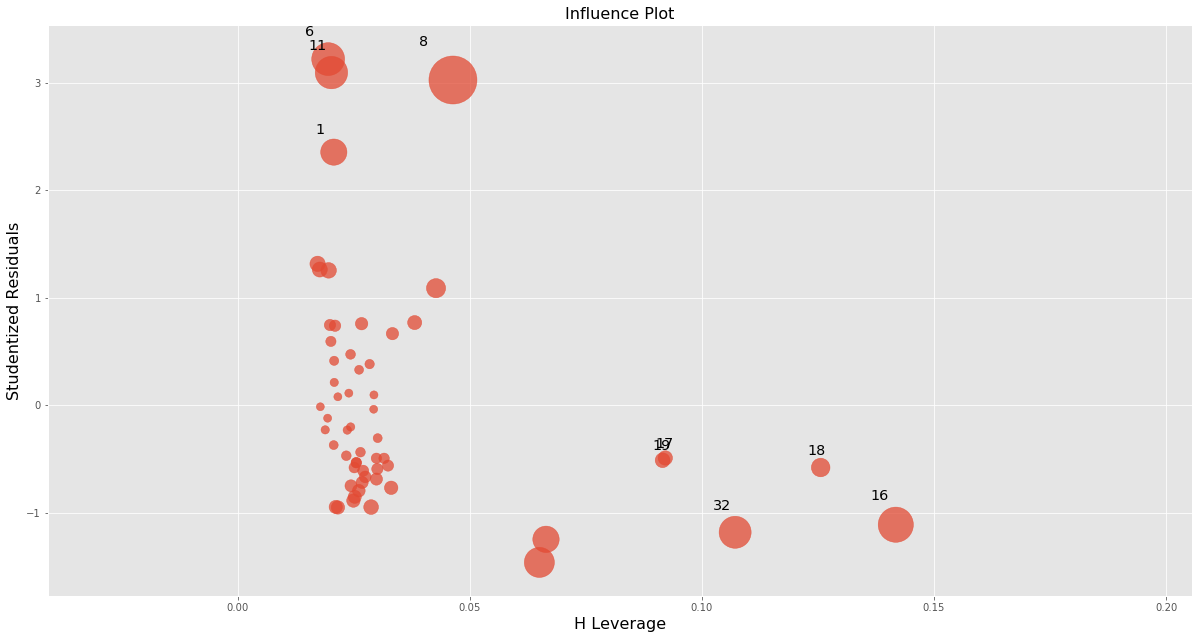

In [89]:
fig = sm.graphics.influence_plot(model, criterion='cooks')
fig.set_size_inches(20.5, 10.5)

In [65]:
cbike_income.iloc[[6,8,11, 16, 18]]

,Zipcodes,Income,Number of returns,Number of joint returns,Number of dependent exemptions,Individual_Income,Number of rides
6,10009,2814678.0,32690.0,5090.0,9060.0,60.091332,89962
8,10011,9080628.0,30190.0,5840.0,5550.0,218.389322,100299
11,10014,5751000.0,18720.0,3440.0,2980.0,228.758950,94595
16,10021,14303821.0,23350.0,6660.0,6370.0,393.178147,26207
18,10023,13623617.0,34400.0,9810.0,9890.0,251.822865,35610


In [93]:
cbike_income_update = cbike_income.drop(cbike_income.index[[16,17,18,19,32]])

In [94]:
x2 = cbike_income_update['Income']
y2 = cbike_income_update['Number of rides']

model2 = smf.ols(formula = 'y2 ~ x2', data=cbike_income_update).fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     15.21
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           0.000282
Time:                        17:16:43   Log-Likelihood:                -605.20
No. Observations:                  53   AIC:                             1214.
Df Residuals:                      51   BIC:                             1218.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.083e+04   4877.801      2.221      0.031    1040.358    2.06e+04
x2             0.0044      0.001      3.900      0.000       0.002       0.007
==============================================================================
Omnibus:                       12.724   Durbin-Watson:                   1.364
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.002
Skew:                           0.978   Prob(JB):                     0.000911
Kurtosis:                       4.586   Cond. No.                     6.85e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

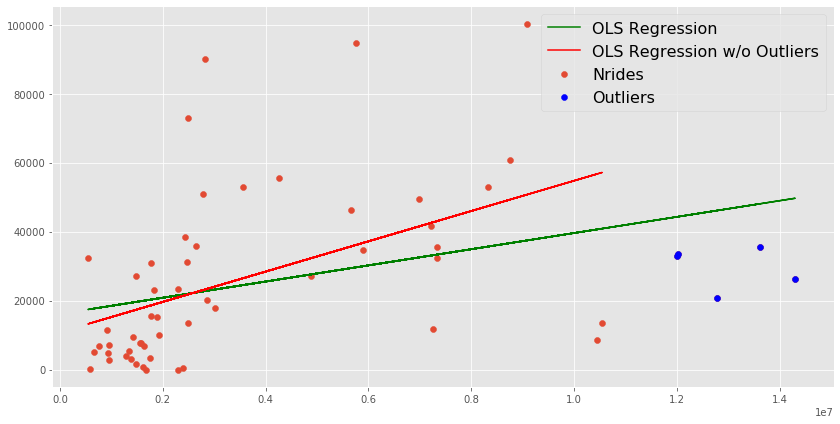

In [95]:
fig, ax = plt.subplots(figsize=(14,7))
ax.scatter(cbike_income['Income'], cbike_income['Number of rides'], marker='o', label='Nrides')
ax.scatter(cbike_income.iloc[[16,17,18,19,32]]['Income'], cbike_income.iloc[[16,17,18,19,32]]['Number of rides'], color='blue', marker='o', label='Outliers')
ax.plot(x, model.predict(), color='green', label='OLS Regression')
ax.plot(x2, model2.predict(), color='red', label='OLS Regression w/o Outliers')
ax.legend(loc = 'upper right', fontsize = 16)
model2.summary()